<small>November 7, 2023</small> | <small>Entry No. 1</small>

### Table of Contents

* [Introduction](#introduction)
* [Understanding the Data](#understanding)
* [Methodology](#methodology)
* [Command List](#command-list)
* [Exploratory Analysis](#exploratory-analysis)
* [Model Overview](#model-overview)
* [Discord](#discord)
* [Closing Statements](#closing-statements)

# Introduction

<p>Agrotech Live is in a state of development where findings can be properly documented in notebooks. These journals will serve as research notes for the ongoing buildout of the program and exploratory analysis of agriculture data through the use of the program.</p>
<p>At its core, the program is an agricultural environement monitoring system. It allows a user to perform various analyses for ensuring the overall health of eukaryotic organisms from information about ts surroundings.</p> 
<p>It is capable of performing evalution metrics to record performance of prediction models that guess an organism's reaction to a particular environment change. </p>

## Understanding the Data

<p>Four data points are currently used to monitor an envronment. <b>Temperature</b> measured in Celcius. <b>Moisture</b> measured in percentage out of one hundred. <b>Light</b> measured in lux, indicating light intensity.</li> <b>Conductivity</b> measured in microsiemens per centimeter, showing fertility.</li>

<p>"Timestamp" and "MAC" fields help identify which devices made a particular entry and when. This data can be useful for generating dashboards in the client application.</p>
<p>In version 1.3, the read functionality is limited to one device which helps with data processing for demonstration purposes.</p>

## Methodology

<p>Environmental data is collected with devices that transmit signals over a Bluetooth Low Energy (BLE) frequency.</p>

<p>The device in question is called the "WANFEI Plant Monitor Soil Test Kit" and is available for purchase <a src="https://www.amazon.com/WANFEI-Intelligent-Bluetooth-Fertility-Temperature/dp/B09PV3T356/ref=sr_1_1_sspa?keywords=wanfei%2Bplant%2Bcare&qid=1700677321&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&th=1">on Amazon</a>.</p> 

<p>Below is a diagram of the data collection and sorting process performed in read.py when the <code>sesh, new sesh</code> or <code>push</code> commands are initiated.</p>

<div style="text-align:center;">
    <img src="/home/jeremy/Documents/AGT/journal/images/readpy-data-flow.png" width="700px" height="auto"></img>
</div>


<p>"sesh.json" is the source file used for testing data in the health score model and performing plot commands in the application.  This same data is then also saved to a folder of daily readings where each json file within the dated folder contains all samples collected from that day. </p>

## Command List

<b>System Functions</b>
<ul>
<li><code>read/push</code> - saves most recent device sensor data entry</li>
<li><code>scan</code> - search for any available devices</li>
<li><code>find</code> - search for a specific device using MAC</li>
<li><code>sesh</code> - start a session of repeating "read" commands</li>
<li><code>new sesh</code> - clear all sesh.json data and start a new session</li>
<li><code>live</code> - start web server interface</li>
</ul>

<b>Analytical Functions</b>
<ul>
<li><code>train</code> - train model for most recent health score</li>
<li><code>testing model</code> - train the testing health score model (model-test.py)</li>
<li><code>summary/line</code> - build a line graph of sesh.json data</li>
<li><code>trend</code> - plot commonly trending data points from sesh.json</li>
<li><code>fcast</code> - build predictions based on patterns from rolling average (ARIMA)</li>
<li><code>fcast 3d</code> - build visualize predictions</li>
<li><code>corr</code> - generates correlation analysis along with a matrix visual</li>
<li><code>pred</code> - builds 3d visual of ARIMA prediction analysis</li>
<li><code>cleaner</code> - displays all samples in batch and sesh.json file</li>
</ul>

<b>Export Functions</b>
<li><code>export</code> - save sesh.json data to json file</li>
<li><code>export csv</code> - save sesh.json data to csv file</li>
<li><code>export xl</code> - save sesh.json data to excel file</li>


## Exploratory Analysis

<h4>Below are examples of analyses performed on the sesh.json data using the above commands.</h4>

<p>Running the 'trend' command can compare two features by generating a plot for the values.</p>

<p>Here's a quick overview of the datasets used in the model to determine health score.</p>

In [1]:
import json
import pandas as pd

# Load spider plant ideal dataset
with open('/home/jeremy/Documents/AGT/__files__/batches/spiderplant.json', 'r') as f:
    train_data = json.load(f)

df_train = pd.DataFrame(train_data)
df_train.head(5)

,Timestamp,MAC,Temperature,Moisture,Light,Conductivity
0,2024-02-29 12:22:35,c4:7c:8d:6d:24:ed,21.2,1,150,0
1,2024-02-29 12:22:39,c4:7c:8d:6d:24:9e,20.3,3,152,0
2,2024-02-29 12:33:03,c4:7c:8d:6d:24:ed,21.3,1,197,0
3,2024-02-29 12:33:07,c4:7c:8d:6d:24:9e,20.5,3,187,0
4,2024-02-29 12:43:33,c4:7c:8d:6d:24:ed,21.2,1,151,0


<p>After the imports, we load the training dataset. This training data can be the ideal feature values in which a particular organism would sucessfully propogate.</p>

<p>For comparison, here is the current data from sesh.json.</p>

In [2]:
import json
import pandas as pd

# Load current dataset
with open('/home/jeremy/Documents/AGT/sesh.json', 'r') as f:
    session_data = json.load(f)

sesh_df = pd.DataFrame(session_data)

# Remove square brackets from each value
sesh_df = sesh_df.apply(lambda x: x.str[0] if x.dtype == 'object' and isinstance(x[0], list) else x)
sesh_df.head(5)

,Timestamp,MAC,Temperature,Moisture,Light,Conductivity
0,2024-04-29 21:26:13,c4:7c:8d:6d:24:ed,27.4,0,17,0
1,2024-04-29 21:29:06,c4:7c:8d:6d:24:ed,27.4,0,74,0
2,2024-04-29 21:39:33,c4:7c:8d:6d:24:ed,27.4,0,37,0
3,2024-04-29 21:50:01,c4:7c:8d:6d:24:ed,27.1,0,74,0
4,2024-04-29 22:00:28,c4:7c:8d:6d:24:ed,27.0,0,37,0


<p>Note: Currenlty sesh.json values are contained in square brackets. Some cleaning may need to be performed to use this data with ease.</p>

In [3]:
import numpy as np

# Load the data
with open('/home/jeremy/Documents/AGT/sesh.json') as f:
    data = json.load(f)

# Extract the values for each feature
temperature = [d['Temperature'][0] for d in data]
moisture = [d['Moisture'][0] for d in data]
light = [d['Light'][0] for d in data]
conductivity = [d['Conductivity'][0] for d in data]

# Calculate the average for each feature
temperature_avg = np.mean(temperature)
moisture_avg = np.mean(moisture)
light_avg = np.mean(light)
conductivity_avg = np.mean(conductivity)

# Print the results
print("SESSION Average Values:")
print(f"Temperature average: {temperature_avg:.2f}")
print(f"Moisture average: {moisture_avg:.2f}")
print(f"Light average: {light_avg:.2f}")
print(f"Conductivity average: {conductivity_avg:.2f}")

# Load training data
with open('/home/jeremy/Documents/AGT/__files__/batches/spiderplant.json') as f:
    train_data = json.load(f)

# Extract the values for each feature
temperature = [d['Temperature'] for d in train_data]
moisture = [d['Moisture'] for d in train_data]
light = [d['Light'] for d in train_data]
conductivity = [d['Conductivity'] for d in train_data]

# Calculate the average for each feature
temperature_avg = np.mean(temperature)
moisture_avg = np.mean(moisture)
light_avg = np.mean(light)
conductivity_avg = np.mean(conductivity)
print('')
# Print the results
print("TRAINING Average Values:")
print(f"Temperature average: {temperature_avg:.2f}")
print(f"Moisture average: {moisture_avg:.2f}")
print(f"Light average: {light_avg:.2f}")
print(f"Conductivity average: {conductivity_avg:.2f}")



SESSION Average Values:
Temperature average: 22.26
Moisture average: 0.28
Light average: 48.30
Conductivity average: 0.00

TRAINING Average Values:
Temperature average: 20.91
Moisture average: 2.00
Light average: 121.94
Conductivity average: 0.00


<p>Above is a summary of the averages from each feature per dataset.</p>

<h3>Forecasting feature data points</h3>

<p>With commands such as <code>fcast</code> and <code>fcast 3d</code>, we can predit where certain data points will be at a particular time using the ARIMA model.</p>
<p>Below is the output of the ' fcast ' command before saving forecast data to the `\__files__\predict` folder.</p>

In [4]:
import os
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime, timedelta

# Load the JSON data from the file
with open('/home/jeremy/Documents/AGT/sesh.json') as f:
    data = json.load(f)

# Convert timestamp to integer if necessary
for i in range(len(data)):
    if type(data[i]['Timestamp'][0]) != int:
        data[i]['Timestamp'][0] = int(data[i]['Timestamp'][0])

# Extract data from the JSON into separate lists
timestamps = [i['Timestamp'][0] for i in data]
temperatures = [i['Temperature'][0] for i in data]
moistures = [i['Moisture'][0] for i in data]
lights = [i['Light'][0] for i in data] 
conductivities = [i['Conductivity'][0] for i in data]

# Define the number of steps to forecast
n_steps = 5

# Fit the ARIMA model to the temperature data
model = sm.tsa.ARIMA(temperatures, order=(1, 1, 1))
model_fit = model.fit()
predictions_temperatures = model_fit.predict(start=len(temperatures), end=len(temperatures)+n_steps-1)

# Fit the ARIMA model to the moisture data
model = sm.tsa.ARIMA(moistures, order=(1, 1, 1))
model_fit = model.fit()
predictions_moistures = model_fit.predict(start=len(moistures), end=len(moistures)+n_steps-1)

# Fit the ARIMA model to the light data
model = sm.tsa.ARIMA(lights, order=(1, 1, 1))
model_fit = model.fit()
predictions_lights = model_fit.predict(start=len(lights), end=len(lights)+n_steps-1)

# Fit the ARIMA model to the conductivity data
model = sm.tsa.ARIMA(conductivities, order=(1, 1, 1))
model_fit = model.fit()
predictions_conductivities = model_fit.predict(start=len(conductivities), end=len(conductivities)+n_steps-1)

# Assuming timestamps are in seconds
# Determine the interval between each timestamp
interval = timestamps[-1] - timestamps[-2]

# Generate new timestamps based on this interval for n_steps into the future
new_timestamps = [timestamps[-1] + interval * i for i in range(1, n_steps+1)]

# append new timestamps to existing timestamps
timestamps += new_timestamps

print('Temperature predictions:')
print(predictions_temperatures)
print('Light predictions:')
print(predictions_lights)
print('Moisture predictions:')
print(predictions_moistures)
print('Conductivity predictions:')
print(predictions_conductivities)

ValueError: invalid literal for int() with base 10: '2024-04-29 21:26:13'

<h3>Correlation analysis</h3>

<p>Performing a correlation analysis helps to understand how related each feature is to one another. This is useful in determining the overall health of a subject and calculating the health score from R2 values. This type of anlaysis can be performed using the <code>corr</code> command.</p>

              Temperature  Moisture     Light  Conductivity
Temperature      1.000000  0.220519 -0.014119           NaN
Moisture         0.220519  1.000000 -0.036544           NaN
Light           -0.014119 -0.036544  1.000000           NaN
Conductivity          NaN       NaN       NaN           NaN


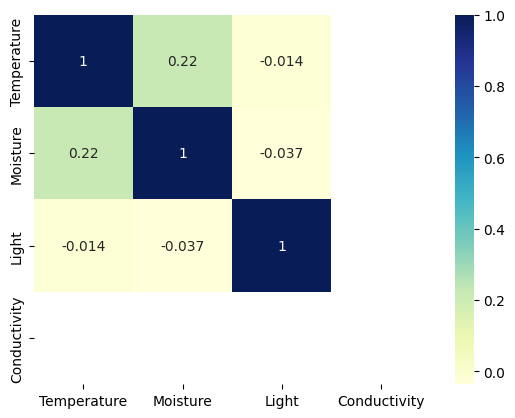

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the df from a JSON file into a pandas dfFrame
df = pd.read_json("/home/jeremy/Documents/AGT/sesh.json")

# convert the df types of the columns to float
df['Moisture'] = df['Moisture'].str[0]
df['Light'] = df['Light'].str[0]
df['Temperature'] = df['Temperature'].str[0]
df['Conductivity'] = df['Conductivity'].str[0]

# calculate the Pearson correlation coefficient between light and temperature
correlation = df.corr(numeric_only=True)

sns.heatmap(correlation, annot=True, cmap='YlGnBu')

print(correlation)

<p>When analyzing R2 scores for correlation, values which are closest to zero show higher correlation, whereas those farther from zero represent a lower corrrelation. Values can be positively or negativly correlated as well.</p>

<h2>Model Overview</h2>

<h3>Background</h3>

<p>In the context of this research, a health score is representitive of how closely related each of the four features are to one another from the training and testing sets. This information useful because it helps us understand which environments the subject is most prosperous in and predicting how a particular environment change might affect it's overall health.</p>

<p>Through use of the <code>sesh</code> command, the process populates "sesh.json" with a constant stream of live samples which become the testing data. Training data consists of ideal data points for optimal growth at any particular point in the subject's lifespan. These ideal datasets are called <i>batches</i>, located in the "__files__" folder.</p> 

<h4>Execute Imports</h4>

In [7]:
import sys
import os
import torch
import torch.nn as nn
import json
import numpy as np
import argparse
from datetime import datetime, timedelta
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

<h3>Preprocessing & Normalization</h3>

<p>We start by perfoming preprocessing through normalization on the batch data with <code>StandardScaler()</code> as the main method.</p>

In [8]:
# Load spider plant ideal dataset
with open('/home/jeremy/Documents/AGT/__files__/batches/spiderplant.json', 'r') as f:
    ideal_data = json.load(f)

# Extract features and normalize
features = []
targets = []

for entry in ideal_data:
    features.append([
        entry["Light"], entry["Moisture"], entry["Conductivity"],
        entry["Temperature"]
    ])
    targets.append([
        entry["Temperature"], entry["Moisture"], entry["Light"],
        entry["Conductivity"]
    ])
scaler = StandardScaler()
features = scaler.fit_transform(features)

<p>Setting random seeds</p>

In [9]:
# Seed PyTorch
torch.manual_seed(20)

# Seed NumPy
np.random.seed(20)

<p>To prepare the training data, plug the training and test datasets to x_train and y_train train values using PyTorch.</p>

In [10]:
X_train = torch.tensor(features, dtype=torch.float32)
y_train = torch.tensor(targets, dtype=torch.float32)
current_day = datetime.now().day

<p>This operation also loads additional test data from JSON file based on the date. </p>

<p>Initilize parameters for counting missed days in the past two weeks.</p>

In [11]:
# Initialize missed days counter
test_data = []
num_days_loaded = 0
num_days_missing = 0

# Get today's date
today = datetime.now()

# Load the past 30 days of test data
for i in range(1, 15):
    # Calculate the date for each file
    test_date = today - timedelta(days=i)
    
    # Format the date as a string in the desired format
    date_string = test_date.strftime('%Y-%m-%d')

    # date_string = '2023-06-05'

    filename = f'/home/jeremy/Documents/AGT/__files__/read_files/{date_string}/AGT-{date_string}.json'
    
    if os.path.isfile(filename):
        with open(filename, 'r') as f:
            day_data = json.load(f)
            test_data.extend(day_data)
            num_days_loaded += 1
    else:
        num_days_missing += 1

In [12]:
print(f"Loaded {num_days_loaded} days of data out of {i} days expected.")
if num_days_missing > 0:
    print(f"Data not found for {num_days_missing} day(s).")

Loaded 6 days of data out of 14 days expected.
Data not found for 8 day(s).


<p>Now we begin setting up the test features and targets to be loaded in the health score model.</p>

In [13]:
test_features = []
test_targets = []

for entry in test_data:
    test_features.append([
        entry["Light"], entry["Moisture"], entry["Conductivity"],
        entry["Temperature"]
    ])
    test_targets.append([
        entry["Temperature"], entry["Moisture"], entry["Light"],
        entry["Conductivity"]
    ])

test_features = scaler.transform(test_features)  # use the same scaler to ensure the same scale is used

X_test = torch.tensor(test_features, dtype=torch.float32)
y_test = torch.tensor(test_targets, dtype=torch.float32)

<p>For documentation purposes, the contents of <code>nn.py</code> is laid out below. In this file the neural network is being established with four layers.</p>

In [14]:
class SoilHealthPredictor(nn.Module):
    def __init__(self):
        super(SoilHealthPredictor, self).__init__()
        self.layer1 = nn.Linear(4, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 4)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        return x

<p>Initalize Mean Squared error, Adam optimizer and training parameters.</p>

In [15]:
model = SoilHealthPredictor()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

<h3>Training the Model</h3>

<p>Begin the training loop which iterates over the dataset in min-batches, performs forward and backward passes, and updates the model weights.</p>

In [16]:
# Training parameters
epochs = 100
batch_size = 32

# Training loop
for epoch in range(epochs):
    print(f'Starting Epoch {epoch+1}/{epochs}')
    for i in range(0, len(X_train), batch_size):
        # Get mini-batch
        inputs = X_train[i:i + batch_size]
        labels = y_train[i:i + batch_size]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate and print training and test losses
    with torch.no_grad():
        train_loss = criterion(model(X_train), y_train)
        test_loss = criterion(model(X_test), y_test)

    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    print('-' * 50)

# Training complete
current_time = datetime.now()
print(f'*** Training Complete at {current_time.strftime("%Y-%m-%d %H:%M:%S")} ***')

# Save the model
with torch.no_grad():
    test_predictions = model(X_test)
    actual_temperatures = y_test[:, 0].numpy()
    predicted_temperatures = test_predictions[:, 0].numpy()


Starting Epoch 1/100
Epoch [1/100], Train Loss: 22093.9180, Test Loss: 8627.5488
--------------------------------------------------
Starting Epoch 2/100
Epoch [2/100], Train Loss: 22064.9844, Test Loss: 8378.2393
--------------------------------------------------
Starting Epoch 3/100
Epoch [3/100], Train Loss: 22000.5098, Test Loss: 7894.3252
--------------------------------------------------
Starting Epoch 4/100
Epoch [4/100], Train Loss: 21864.4609, Test Loss: 6983.5801
--------------------------------------------------
Starting Epoch 5/100
Epoch [5/100], Train Loss: 21593.6816, Test Loss: 5665.2803
--------------------------------------------------
Starting Epoch 6/100
Epoch [6/100], Train Loss: 21094.2500, Test Loss: 4329.4248
--------------------------------------------------
Starting Epoch 7/100
Epoch [7/100], Train Loss: 20243.1660, Test Loss: 4910.1323
--------------------------------------------------
Starting Epoch 8/100
Epoch [8/100], Train Loss: 18917.1191, Test Loss: 12303

Epoch [38/100], Train Loss: 148.9646, Test Loss: 386691.4375
--------------------------------------------------
Starting Epoch 39/100
Epoch [39/100], Train Loss: 140.5815, Test Loss: 386074.3438
--------------------------------------------------
Starting Epoch 40/100
Epoch [40/100], Train Loss: 133.5069, Test Loss: 385973.8125
--------------------------------------------------
Starting Epoch 41/100
Epoch [41/100], Train Loss: 127.5817, Test Loss: 386388.5625
--------------------------------------------------
Starting Epoch 42/100
Epoch [42/100], Train Loss: 122.6280, Test Loss: 386896.9375
--------------------------------------------------
Starting Epoch 43/100
Epoch [43/100], Train Loss: 118.4735, Test Loss: 387056.5312
--------------------------------------------------
Starting Epoch 44/100
Epoch [44/100], Train Loss: 114.9753, Test Loss: 386797.9375
--------------------------------------------------
Starting Epoch 45/100
Epoch [45/100], Train Loss: 112.0488, Test Loss: 386346.9062
-

<h3>Evaluation Metrics</h3>

<p>R2 scores are taken from each feature comparing how closely related the train dataset is from the testing. These metrics are used to help us evaluate the model's accuracy.</p>

<p>As a reminder, values which are closest to zero show that the test feature is highly correlated to the train feature of the other dataset.</p>

In [17]:
temperature_r2_score = r2_score(actual_temperatures, predicted_temperatures)
# Similarly for moisture, light, and conductivity

# Calculate R2 score for Moisture, Light, and Conductivity
actual_moisture = y_test[:, 1].numpy()
predicted_moisture = test_predictions[:, 1].numpy()
moisture_r2_score = r2_score(actual_moisture, predicted_moisture)

actual_light = y_test[:, 2].numpy()
predicted_light = test_predictions[:, 2].numpy()
light_r2_score = r2_score(actual_light, predicted_light)

actual_conductivity = y_test[:, 3].numpy()
predicted_conductivity = test_predictions[:, 3].numpy()
conductivity_r2_score = r2_score(actual_conductivity, predicted_conductivity)

print('')
print('Evaluation Metrics:')
print(f'Temperature R2 Score: {temperature_r2_score:.4f}')
print(f'Moisture R2 Score: {moisture_r2_score:.4f}')
print(f'Light R2 Score: {light_r2_score:.4f}')
print(f'Conductivity R2 Score: {conductivity_r2_score:.4f}')
print('/ / / / / / / / / / / /')



Evaluation Metrics:
Temperature R2 Score: -12558.0795
Moisture R2 Score: -2145.7116
Light R2 Score: -168.1838
Conductivity R2 Score: -4.2619
/ / / / / / / / / / / /


<p>Save the trained model and load it.</p>

In [18]:
# Save the trained model
torch.save(model.state_dict(), 'trained_model.pth')
print('Model saved successfully at "trained_model.pth" on ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
# Load the saved model
loaded_model = SoilHealthPredictor()
loaded_model.load_state_dict(torch.load('trained_model.pth'))
loaded_model.eval()

Model saved successfully at "trained_model.pth" on 2023-11-24 00:07:39


SoilHealthPredictor(
  (layer1): Linear(in_features=4, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (layer4): Linear(in_features=16, out_features=4, bias=True)
)

<p>This data can be visualized with the following data points.</p>

In [19]:
# Save for visualization
np.save('y_test.npy', y_test.numpy())
np.save('test_predictions.npy', test_predictions.numpy())
np.save('y_train.npy', y_train.numpy())
np.save('X_train.npy', X_train.numpy())
torch.save(model.state_dict(), 'trained_model.pth')

<h3>Health Score</h3>

<p>At this time, all values are considered to determine a health score. Current date and time variables are initalized to use as title headers for daily data folders. A dictionary is created with key value pairs being each feature and it's respective value.</p>

In [20]:
health_score = 0
 
# Get current date and time and format them as strings
current_date = datetime.now().strftime("%Y-%m-%d")
current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Define the data
r2_scores = {
    "timestamp": current_time,  # added timestamp directly to the dictionary
    "temperature_r2": temperature_r2_score,
    "moisture_r2": moisture_r2_score,
    "light_r2": light_r2_score,
    "conductivity_r2": conductivity_r2_score,
}

<p>Another copy of the r2 scores is saved to "__files__/metrics" for future reference.</p>

In [21]:
# Create a copy of the r2_scores for saving to r2_scores.json
r2_scores_raw = r2_scores.copy()

# Remove the 'timestamp' and 'health_score' key-value pair from the dictionary
r2_scores_raw.pop('timestamp', None)
r2_scores_raw.pop('health_score', None)

with open('/home/jeremy/Documents/AGT/__files__/metrics/r2_scores.json', 'w') as f:
    json.dump(r2_scores_raw, f)

<p>In order to determine evaluate accuracy, the R2 values are converted from percentages and divided by the number of features which becomes the average R2 score or the 'health score'.</p>

In [22]:
# Calculate the health score
r2_scores_keys = list(r2_scores.keys())
health_score = 0  # initialize this to prevent an error in case it's not defined earlier
for key in r2_scores_keys:
    if key != 'timestamp':  # Skip the timestamp field
        r2 = max(r2_scores[key], 0)  # Ensure the score is not negative
        health_score += r2 * 100  # Scale to 0-100
health_score /= len(r2_scores_keys) - 1  # Subtract 1 from the denominator because we're not including the timestamp field

print(f'\nHealth Score: {health_score:.2f}\n')

r2_scores['timestamp'] = current_time
r2_scores['health_score'] = health_score


Health Score: 0.00



<p>Saving R2 data to daily metrics folder in the files directory.</p>

In [24]:

# Define the folder for today's data
daily_folder = os.path.join("/home/jeremy/Documents/AGT/__files__/metrics", current_date)

# Create the directory for the current day if it doesn't already exist
if not os.path.exists(daily_folder):
    os.makedirs(daily_folder)

# Define the daily JSON file path
daily_json_file = os.path.join(daily_folder, f'AGT-STAT-{current_date}.json')

# Load existing data if the file exists, otherwise create an empty list
if os.path.exists(daily_json_file):
    with open(daily_json_file, 'r') as f:
        daily_data = json.load(f)
else:
    daily_data = []

# Append new records to the existing data
daily_data.append(r2_scores)

# Save the updated data to the daily JSON file
with open(daily_json_file, 'w') as f:
    json.dump(daily_data, f)

<h2>Discord</h2>
<h3>Commands</h3>
<p>Ultimately, all commands in AGT will also be command line prompts in the Wiggle Room server's #agrotech channel.</p>

<p>Currenly, there are two commands that can be used through Igore to control the Agrotech system.</p>

<ul><li><p><code>/ agt-train</code>: directly trains on the most recent sesh.json data with the currently specified batch in the data model</p></li><p><li><code>/ agt-src-top</code>: pulls the latest entry in sesh.json</li></ul>

<p>For security purposes, more commands will be added in the beta version of Agrotech Live.</p>

<h3>Reports & Summaries</h3>

<p>When the system is active, every ten minutes Carma bot fetches the latest record from sesh.json and displays it in the #agrotech channel.</p>

<p>Carma is also checking for consistent changes in the data which would indicate a new trend. If so, it is specified in the latest #agrotech channel message along with a plotted visual.</p>

<div style="text-align:center;">
    <img src="/home/jeremy/Documents/AGT/journal/images/Ongoing-Trend.png" width="700px" height="auto"></img>
</div>

<p>Logic for the trend detection algorithm located in the Wiggle Room codebase and written in Javascript, so it will not run here.</p>

<p>It performs the following steps to determine a new trend.</p>

In [ ]:
# Detection block is callable by the main program file
async function detectTrend(data) {
  # Create an array of [index, value] pairs for the data
  let pairs = data.map((value, index) => [index, value]);

# Calculate the linear regression
  let regression = ss.linearRegression(pairs);

  # The 'm' property of the regression result is the slope of the line.
  # If the slope is significantly different from zero, then a trend is detected.
  if (Math.abs(regression.m) > 0.01) {  // Adjust the threshold as per your requirements
   # Once the trend is detected, it is then sent to then attached to the message in #agrotech
    console.log("Trend detected.");
    return true;
  } else {
    # No trend detected, return false.
    console.log("No new trends found.");
    return false;
  }
}

<h2>Closing Statements</h2>

<p>The purpose of conducting this research is to understand if simulated envronments adided by machine learning data models can help humans and machines alike make more informed decisions in caring for eukaryotic life. Through the use of various statstical data models, we can determine a health score based on the average correlation between features from an ideal environment and the live session environtment data.</p>

<p>Agrotech Live is a command line interface program which aims to automate this method of determining a subject's health such that it's capablities can be useful for other backend and commerical uses. To distinguish this differnece, a separate version of the program is being developed at the Wiggle Room.</p>

<P>Updates to the Agrotech Live commercial system will be announced in the #dev-log channel following updates to backend versions. Eventually, monthly and quarterly reports will be automattically generated for use.</p>

<small>&copy; Agrotech Live 2023</small>